In [47]:
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
#columnNames = ["id","text", "topic", "author", "pos", "location", "party", "false", "barely", "half", "mostly", "pantsonfire", "context"]
df = pd.read_csv("liar.csv")

# Cleaning

In [49]:
df = df.dropna()

In [50]:
df['party'].count()

6750

In [51]:
# finds the word count of article text and appends to the dataframe

count_list = []
for i in df['text']:
    count = len(i.split())
    count_list.append(count)
    
df.loc[:,'word_count'] = count_list

In [52]:
# create binary ground truth for possible eval

truth = []
for i in df['label']:
    
    if (i == "FALSE" or i == "pants-fire"):
        truth.append(0)
    else:
        truth.append(1)
df.loc[:,'truthval'] = truth

In [54]:
#tokenize for LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.stem.porter import PorterStemmer

skl_stopwords = list(text.ENGLISH_STOP_WORDS)

all_skl_stopwords = skl_stopwords + ["00", "10", "000", "year", "years", "says", "just", "said", 'state', 'states', 'percent', 'people', 'new']

binary = CountVectorizer(binary=False, stop_words = all_skl_stopwords, min_df= 0.0199) 
binary_dm = binary.fit_transform(df['text'])


pd.DataFrame(binary_dm.toarray(),columns = binary.get_feature_names())


,america,american,americans,barack,billion,budget,care,clinton,country,cut,federal,government,health,hillary,jobs,law,million,money,obama,office,pay,plan,president,public,rate,republican,spending,tax,taxes,texas,time,united,voted,wisconsin
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6747,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
#Implement LDA and retain topics

def create_topics(model, feature_names, nob):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append(topic_idx)
        topics.append(([feature_names[i] for i in topic.argsort()[:-nob - 1:-1]]))
        
        
    return topics
from sklearn.decomposition import LatentDirichletAllocation as lda

LDA = lda(n_components = 5, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(binary_dm)

topics = create_topics(LDA, binary.get_feature_names(), 3)


In [56]:
# drop topic indices
for x in topics:
    if (type(x) == int):
        topics.remove(x)
        
for topic in topics:
    print(topic)

['jobs', 'million', 'americans']
['texas', 'united', 'voted']
['federal', 'government', 'law']
['obama', 'health', 'president']
['tax', 'billion', 'taxes']


In [57]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

In [58]:
sample = nlp("This is a good example!")

In [59]:
#displacy.serve(sample, style = 'dep')

In [60]:
print ([token.pos_ for token in sample])

['DET', 'AUX', 'DET', 'ADJ', 'NOUN', 'PUNCT']


In [61]:
def assignSpeech(listoftext):
    
    nouns = []
    adjectives = []
    adverbs = []
    proper_nouns = []
    for text in listoftext:
        spacydText = nlp(text)
        nounCount = 0
        adjCount = 0
        advCount = 0
        pnounCount = 0
        for token in spacydText:
            if token.pos_ == 'NOUN':
                nounCount += 1
            if token.pos_ == 'ADJ':
                adjCount += 1
            if token.pos_ == 'ADV':
                advCount += 1
            if token.pos_ == 'PROPN':
                pnounCount += 1
        nouns.append(nounCount)
        adjectives.append(adjCount)
        adverbs.append(advCount)
        proper_nouns.append(pnounCount)
    
    return nouns, adjectives, adverbs, proper_nouns

In [62]:
nouns, adjectives, adverbs, proper_nouns = assignSpeech(df['text'])

In [63]:
df.loc[:,'adjs'] = adjectives
df.loc[:,'advbs'] = adverbs
df.loc[:,'nouns'] = nouns
df.loc[:,'pnouns'] = proper_nouns

In [64]:
#def toPercent(nouns):
    #nounsPercent = []
    #adjectivesPercent = []
    #adverbsPercent = []
    #proper_nounsPercent = []
df['nounsPercent'] = df['nouns']/df['word_count']
df['adjsPercent'] = df['adjs']/df['word_count']
df['advbsPercent'] = df['advbs']/df['word_count']
df['pnounsPercent'] = df['pnouns']/df['word_count']

In [65]:
# label encoding for location
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['location']= label_encoder.fit_transform(df['location']) 

df['topic'] = label_encoder.fit_transform(df['topic'])

# EDA

In [66]:
pd.set_option('display.max_columns', None)
df.head()

,text,sentiment_token_compound,sentiment_result_token,sentiment_stem_compound,sentiment_result_stem,label,topic,author,pos,location,party,false,barely,half,mostly,pantsonfire,context,word_count,truthval,textCluster,adjs,advbs,nouns,pnouns,nounsPercent,adjsPercent,advbsPercent,pnounsPercent
0,Says the Annies List political group supports ...,0.0,neutral,0.0,neutral,FALSE,16,dwayne-bohac,State representative,56,1,0.0,1.0,0.0,0.0,0.0,a mailer,11,0,3,2,0,4,2,0.363636,0.181818,0.000000,0.181818
1,When did the decline of coal start? It started...,0.0,neutral,0.0,neutral,half-true,1792,scott-surovell,State delegate,63,1,0.0,0.0,1.0,1.0,0.0,a floor speech.,24,1,0,1,2,5,4,0.208333,0.041667,0.083333,0.166667
2,"Hillary Clinton agrees with John McCain ""by vo...",0.0,neutral,0.0,neutral,mostly-true,2001,barack-obama,President,18,1,70.0,71.0,160.0,163.0,9.0,Denver,19,1,0,0,0,2,7,0.105263,0.000000,0.000000,0.368421
3,The Chicago Bears have had more starting quart...,0.0,neutral,0.0,neutral,TRUE,1620,robin-vos,Wisconsin Assembly speaker,73,1,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,27,1,0,3,1,5,3,0.185185,0.111111,0.037037,0.111111
4,I'm the only person on this stage who has work...,0.0,neutral,0.0,neutral,half-true,1850,barack-obama,President,18,1,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",27,1,0,3,2,5,3,0.185185,0.111111,0.074074,0.111111


# More feature engineering

Notes: 
- How many classes should be evaluated? T/F vs pants on fire, false, barely true, etc.
- How to incorporate tokenized vectors?
- How to incorporate the topic models? Assign each ob to a cluster
- All features must be numeric for at least KMeans

Clustering methods to try:
    K-means
    Spectral clustering
    Hierarchical clustering
    DBSCAN
    OPTICS
    Birch


In [67]:

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)


In [68]:
from sklearn.cluster import KMeans


Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_) 

'\nfrom sklearn.cluster import KMeans\n\n\nSum_of_squared_distances = []\nK = range(1,15)\nfor k in K:\n    km = KMeans(n_clusters=k)\n    km = km.fit(features)\n    Sum_of_squared_distances.append(km.inertia_)\n'

In [69]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


"\nplt.plot(K, Sum_of_squared_distances, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Sum_of_squared_distances')\nplt.title('Elbow Method For Optimal k')\nplt.show()\n"

In [70]:
#Clustering of text vectors to create textCluster
from sklearn.cluster import KMeans

cls = KMeans(n_clusters=8)
cls.fit(features)
preds = cls.predict(features)
#print(len(cls.labels_))

df['textCluster'] = preds

In [71]:
#df['textCluster'].value_counts()

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.toarray())

reduced_cluster_centers = pca.transform(cls.cluster_centers_)


'\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components=2)\nreduced_features = pca.fit_transform(features.toarray())\n\nreduced_cluster_centers = pca.transform(cls.cluster_centers_)\n'

In [73]:

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=100, c='b')


"\nplt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))\nplt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=100, c='b')\n"

In [74]:
#correlation matrix of numeric feature

df[['location','party','word_count','textCluster','truthval']].corr()

,location,party,word_count,textCluster,truthval
location,1.000000,NaN,0.015640,0.039576,-0.049402
party,NaN,NaN,NaN,NaN,NaN
word_count,0.015640,NaN,1.000000,-0.015040,0.070266
textCluster,0.039576,NaN,-0.015040,1.000000,0.018520
truthval,-0.049402,NaN,0.070266,0.018520,1.000000


In [75]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.sentiment.util import *
from nltk import tokenize
snowballstemmer = SnowballStemmer("english")
stopwords = stopwords.words('english')

In [76]:
df['text'] = df['text'].dropna()

In [77]:
def text_cleaner(text):
    semiclean_text = []
    for body in text.split():
        body = re.sub(r'@[A-Za-z0-9_]+','',body)
        body = re.sub(r"http\S+", "", body)
        body = re.sub(r"[0-9]*", "", body)
        body = re.sub(r"(”|“|-|\+|`|#|,|;|\|)*", "", body)
        body = re.sub(r"&amp", "", body)
        body = body.lower()
        semiclean_text.append(body)
        #print(semiclean_text)
        
    return semiclean_text

def tokenization_and_stem(semiclean_text):
    total_token_ls = []
    total_snowballstemmer_token_ls = []
    #semiclean_text = ''.join(semiclean_text)
    #print(semiclean_text)
    for sentence in semiclean_text:
        #print(sentence)
        #sentence = ''.join(sentence)
        token_ls = []
        snowballstemmer_token_ls = []
        tokens = nltk.word_tokenize(sentence)
        #print(tokens)
        for token in tokens:
            #print(token)
            if token not in stopwords:
                token_ls.append(token)
                snowballstemmer_token_ls.append(snowballstemmer.stem(token))
        total_token_ls.append(token_ls)
        total_snowballstemmer_token_ls.append(snowballstemmer_token_ls)
        #print(total_token_ls)
   
        return total_token_ls, total_snowballstemmer_token_ls

# Create lists with same length as dataframe column
df_text = [0]*len(df['text'])
token_ls = [0]*len(df['text'])
snowstemmer_token_ls = [0]*len(df['text'])

for num, text in enumerate(df['text']):
    result = tokenization_and_stem(text_cleaner(text))
    if result is not None:
        token_ls[num], snowstemmer_token_ls[num] = tokenization_and_stem(text_cleaner(text))
#print(token_ls)

def back_to_clean_sent(token_ls):
    """
    In order to perform sentiment analysis,
    here we put the words back into sentences. 
    """
    clean_sent_ls = []
    for word_ls in token_ls:
        clean_sent = ""
        for word in word_ls:
            clean_sent += (word + " ")
        clean_sent_ls.append(clean_sent)
    return clean_sent_ls


sentence_tokenized = [0]*len(df["text"])
for num, token in enumerate(token_ls):
    if isinstance(token, int) == False:
        sentence_tokenized[num] = back_to_clean_sent(token)
#print(sentence_tokenized)
    
sentence_snowstemmeed = [0]*len(df["text"])
for num, token in enumerate(snowstemmer_token_ls):
    if isinstance(token, int) == False:
        sentence_snowstemmeed[num] = back_to_clean_sent(token)
        
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_analysis(insert_processed_sentence):
    """
    Do the sentiment analysis
    """
    sentiment = [0]*len(df["text"])
    for num, player_sent in enumerate(insert_processed_sentence):
        ll = []
        if isinstance(player_sent, int) == False:
            for sentence in player_sent:
                ss = analyser.polarity_scores(sentence)
                ll.append(ss)
            sentiment[num] = ll
    return sentiment


#sentiment_original = sentiment_analysis(df["text"])
sentiment_token = sentiment_analysis(sentence_tokenized)
sentiment_snowstemmed = sentiment_analysis(sentence_snowstemmeed)

# Compound Score: 
    # calculated by summing the valence scores of each word in the lexicon
    # normalized to be between -1 (maximum of the negative score) and +1 (maximum of the positive score)
    # ≥ 0.05 is a positive
    # ≤ -0.05 is a negative
    # ≥ 0.05 and ≤ -0.05 is neutral
    
new_df = pd.DataFrame()
i = 0
for senti_token, snow_stem in zip(sentiment_token, sentiment_snowstemmed):
    senti_token_compound = []
    senti_stem_compound = []
    sentiment_result_token = []
    sentiment_result_stem = []

    if isinstance(senti_token, int) == False:
        for s1 in senti_token:
            senti_token_compound.append(s1["compound"])
            if s1["compound"] >= 0.05:
                sentiment_result_token.append("positive")
            elif s1["compound"] <= -0.05:
                sentiment_result_token.append("negative")
            else:
                sentiment_result_token.append("neutral")
                
    if isinstance(snow_stem, int) == False:        
        for s2 in snow_stem:
            senti_stem_compound.append(s2["compound"])
            if s2["compound"] >= 0.05:
                sentiment_result_stem.append("positive")
            elif s2["compound"] <= -0.05:
                sentiment_result_stem.append("negative")
            else:
                sentiment_result_stem.append("neutral")
    
    
    tw_df = pd.DataFrame.from_dict({"text":df["text"][i],
                                "sentiment_token_compound":senti_token_compound,
                                "sentiment_result_token" :sentiment_result_token, 
                                "sentiment_stem_compound":senti_stem_compound,
                                "sentiment_result_stem":sentiment_result_stem})
    new_df = new_df.append(tw_df)
    i += 1
    
    
df_merged = new_df.merge(df, how='inner', on='text')
df = df_merged

'\n\ndef text_cleaner(text):\n    semiclean_text = []\n    for body in text.split():\n        body = re.sub(r\'@[A-Za-z0-9_]+\',\'\',body)\n        body = re.sub(r"http\\S+", "", body)\n        body = re.sub(r"[0-9]*", "", body)\n        body = re.sub(r"(”|“|-|\\+|`|#|,|;|\\|)*", "", body)\n        body = re.sub(r"&amp", "", body)\n        body = body.lower()\n        semiclean_text.append(body)\n        #print(semiclean_text)\n        \n    return semiclean_text\n\ndef tokenization_and_stem(semiclean_text):\n    total_token_ls = []\n    total_snowballstemmer_token_ls = []\n    #semiclean_text = \'\'.join(semiclean_text)\n    #print(semiclean_text)\n    for sentence in semiclean_text:\n        #print(sentence)\n        #sentence = \'\'.join(sentence)\n        token_ls = []\n        snowballstemmer_token_ls = []\n        tokens = nltk.word_tokenize(sentence)\n        #print(tokens)\n        for token in tokens:\n            #print(token)\n            if token not in stopwords:\n        

In [78]:
#df.to_csv('liarcodeData.csv', index=False) 

# Test

In [79]:
df.head()

,text,sentiment_token_compound,sentiment_result_token,sentiment_stem_compound,sentiment_result_stem,label,topic,author,pos,location,party,false,barely,half,mostly,pantsonfire,context,word_count,truthval,textCluster,adjs,advbs,nouns,pnouns,nounsPercent,adjsPercent,advbsPercent,pnounsPercent
0,Says the Annies List political group supports ...,0.0,neutral,0.0,neutral,FALSE,16,dwayne-bohac,State representative,56,1,0.0,1.0,0.0,0.0,0.0,a mailer,11,0,4,2,0,4,2,0.363636,0.181818,0.000000,0.181818
1,When did the decline of coal start? It started...,0.0,neutral,0.0,neutral,half-true,1792,scott-surovell,State delegate,63,1,0.0,0.0,1.0,1.0,0.0,a floor speech.,24,1,6,1,2,5,4,0.208333,0.041667,0.083333,0.166667
2,"Hillary Clinton agrees with John McCain ""by vo...",0.0,neutral,0.0,neutral,mostly-true,2001,barack-obama,President,18,1,70.0,71.0,160.0,163.0,9.0,Denver,19,1,6,0,0,2,7,0.105263,0.000000,0.000000,0.368421
3,The Chicago Bears have had more starting quart...,0.0,neutral,0.0,neutral,TRUE,1620,robin-vos,Wisconsin Assembly speaker,73,1,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,27,1,5,3,1,5,3,0.185185,0.111111,0.037037,0.111111
4,I'm the only person on this stage who has work...,0.0,neutral,0.0,neutral,half-true,1850,barack-obama,President,18,1,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",27,1,6,3,2,5,3,0.185185,0.111111,0.074074,0.111111


### KMeans

In [161]:
feature_domain = df[['party','location','word_count','textCluster', "sentiment_stem_compound", 'word_count','textCluster' ,'nounsPercent', 'advbsPercent', 'pnounsPercent', 'adjsPercent' ]]


X = df[[ 'topic', 'truthval','party'  ]]

model = KMeans(n_clusters = 2)
model.fit(X)
modelPreds = model.predict(X)

### BIRCH

In [162]:
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.cluster import Birch 

#X, clusters = make_blobs(n_samples = 6724, centers = 2, cluster_std = 0.75, random_state = 0) 
  
modelBirch = Birch(branching_factor = 40, n_clusters = 2, threshold = 0.75) 
modelBirch.fit(X)
predsBirch = modelBirch.predict(X)

In [163]:
predsBirch

array([0, 1, 1, ..., 1, 1, 1])

# Eval

In [165]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def create_cm(t1, t2, title):
    cm = confusion_matrix(t1, t2)
    print('precision score: ', precision_score(t1,t2))
    print('recall score: ', recall_score(t1,t2))
    plt.matshow(cm)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

              precision    recall  f1-score   support

           0       0.26      0.34      0.29      1756
           1       0.74      0.65      0.69      4994

    accuracy                           0.57      6750
   macro avg       0.50      0.50      0.49      6750
weighted avg       0.61      0.57      0.59      6750

precision score:  0.73806275579809
recall score:  0.6499799759711654


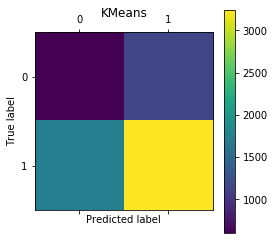

[[ 604 1152]
 [1748 3246]]


In [166]:
print(classification_report(df['truthval'],modelPreds))
create_cm(df['truthval'],modelPreds,"KMeans")

              precision    recall  f1-score   support

           0       0.25      0.38      0.30      1756
           1       0.73      0.60      0.66      4994

    accuracy                           0.54      6750
   macro avg       0.49      0.49      0.48      6750
weighted avg       0.61      0.54      0.56      6750

precision score:  0.7317133038782523
recall score:  0.5969162995594713


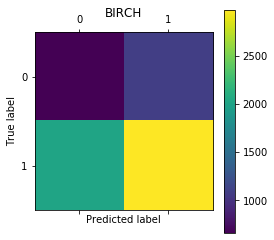

[[ 663 1093]
 [2013 2981]]


In [167]:
print(classification_report(df['truthval'],predsBirch))
create_cm(df['truthval'],predsBirch,"BIRCH")